<a href="https://colab.research.google.com/github/frankfaisca/machine-learning/blob/main/AM_FRANK_BELMIRO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as Bibliotecas

In [62]:
# Load libs

import numpy as np
import pickle
import pandas as pd

#scykit

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

#Evaluation

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report


#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization
%matplotlib inline

#Warnings

import warnings
warnings.filterwarnings("ignore")


Transformando dados com get_dummies e hot encoder

In [63]:

# name columns and load txt

colunas = ['ESCT','NDEP','RENDA','TIPOR','VBEM','NPARC','VPARC','TEL','IDADE','RESMS','ENTRADA','CLASSE']
df = pd.read_csv('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtrain.txt',sep="\t", names=colunas)
df_test = pd.read_csv('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtest.txt',sep="\t", names=colunas)

#load dataframe to hot encoder

df_hot = pd.read_csv('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtrain.txt',sep="\t", names=colunas)
df_test_hot = pd.read_csv('https://raw.githubusercontent.com/MLRG-CEFET-RJ/cic1205/main/data/credtest.txt',sep="\t", names=colunas)


In [ ]:
# transform value from categorical columns using get_dummies

df = pd.get_dummies(df, columns=['ESCT'], prefix = ['ESCT'])
df = pd.get_dummies(df, columns=['TEL'], prefix = ['TEL'])
df = pd.get_dummies(df, columns=['TIPOR'], prefix = ['TIPOR'])

df_test = pd.get_dummies(df_test, columns=['ESCT'], prefix = ['ESCT'])
df_test = pd.get_dummies(df_test, columns=['TEL'], prefix = ['TEL'])
df_test = pd.get_dummies(df_test, columns=['TIPOR'], prefix = ['TIPOR'])

# transform values from categorical columns using hot encoder

np_array = df_hot['ESCT'].values
np_array = np_array.reshape(-1,1)
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoded = encoder.fit_transform(np_array)
df_hot [['ESCT_0', 'ESCT_1', 'ESCT_2', 'ESCT_3']] = one_hot_encoded
df_hot.drop('ESCT', axis=1)


Separando as amostras para treino e teste

In [65]:
seed = 999

# Split the train dataset into features (X) and the target variable (y)
X_train = df.drop('CLASSE', axis=1)
y_train = df['CLASSE']

# Split the test dataset into features (X) and the target variable (y)

X_test = df_test.drop('CLASSE', axis=1)
y_test = df_test['CLASSE']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Sample for Hot Encoder

# Split the train dataset into features (X) and the target variable (y)
X_train_hot = df_hot.drop('CLASSE', axis=1)
y_train_hot = df_hot['CLASSE']

# Split the test dataset into features (X) and the target variable (y)

X_test_hot = df_test_hot.drop('CLASSE', axis=1)
y_test_hot = df_test_hot['CLASSE']

# Scale the features using StandardScaler
scaler_hot = StandardScaler()
X_train_hot = scaler.fit_transform(X_train)
X_test_hot = scaler.transform(X_test)


Regressão Logistica sem Enginering Feature

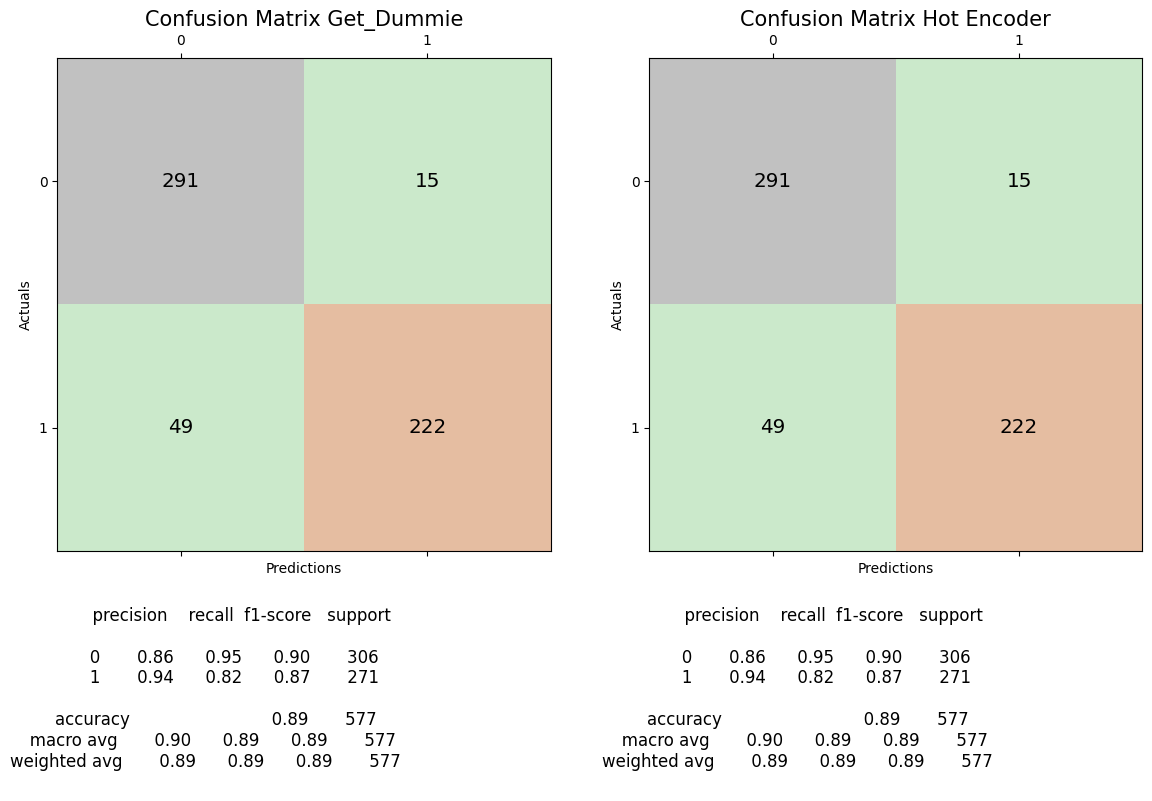

In [89]:
# Create and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=seed)
model.fit(X_train, y_train)

model_hot = LogisticRegression(solver='liblinear', random_state=seed)
model_hot.fit(X_train_hot, y_train_hot)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_hot = model_hot.predict(X_test_hot)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_hot = accuracy_score(y_test_hot, y_pred_hot)
conf_matrix_hot = confusion_matrix(y_test_hot, y_pred_hot)
classification_rep_hot = classification_report(y_test_hot, y_pred_hot)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Get_Dummie', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_hot, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_hot.shape[0]):
    for j in range(conf_matrix_hot.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_hot[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Hot Encoder', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_hot, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()

Decision Tree Classifier sem Engineering Feature

> Bloco com recuo



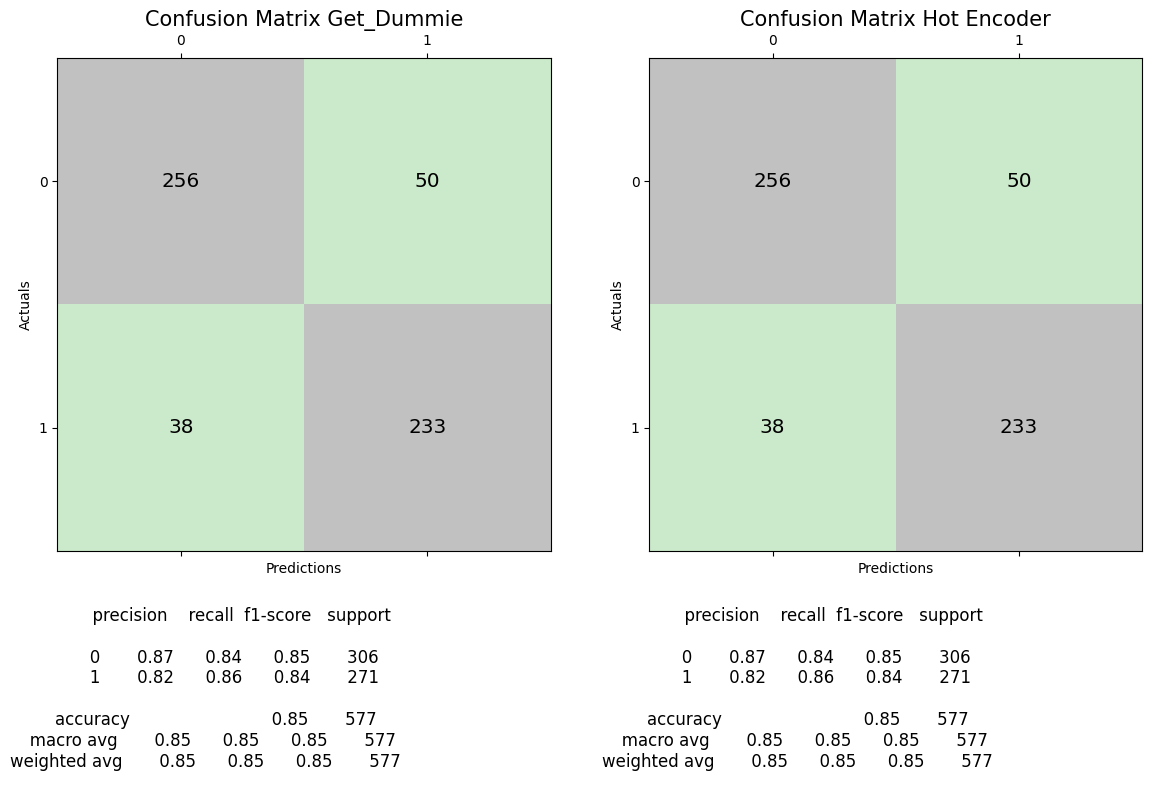

In [91]:
# Create and train the Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=seed)
model.fit(X_train, y_train)

model_hot = DecisionTreeClassifier(random_state=seed)
model_hot.fit(X_train_hot, y_train_hot)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_hot = model_hot.predict(X_test_hot)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_hot = accuracy_score(y_test_hot, y_pred_hot)
conf_matrix_hot = confusion_matrix(y_test_hot, y_pred_hot)
classification_rep_hot = classification_report(y_test_hot, y_pred_hot)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Get_Dummie', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_hot, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_hot.shape[0]):
    for j in range(conf_matrix_hot.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_hot[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Hot Encoder', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_hot, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()

Random Forest Classifier sem Feature Engineering

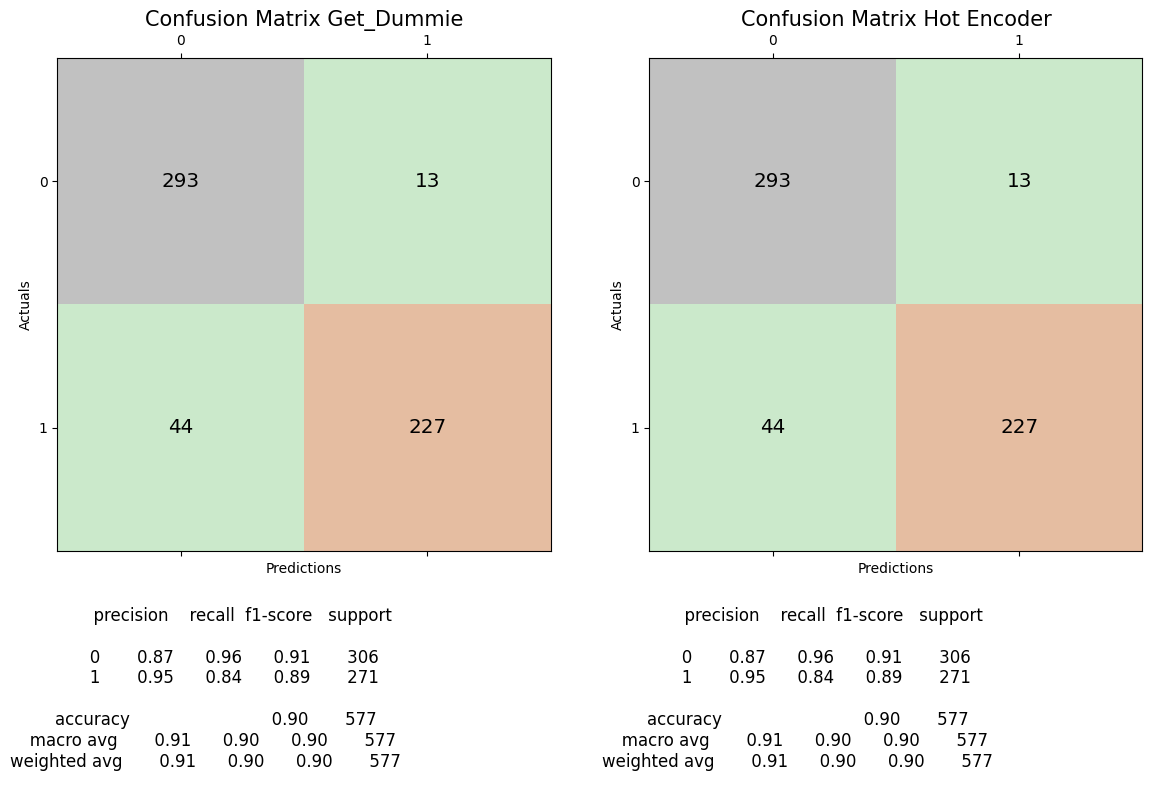

In [92]:
# Create and train the Random Forest model
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)

model_hot = RandomForestClassifier(random_state=seed)
model_hot.fit(X_train_hot, y_train_hot)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_hot = model_hot.predict(X_test_hot)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_hot = accuracy_score(y_test_hot, y_pred_hot)
conf_matrix_hot = confusion_matrix(y_test_hot, y_pred_hot)
classification_rep_hot = classification_report(y_test_hot, y_pred_hot)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Get_Dummie', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_hot, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_hot.shape[0]):
    for j in range(conf_matrix_hot.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_hot[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Hot Encoder', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_hot, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()

Gradient Boosting Classifier sem Feature Engineering

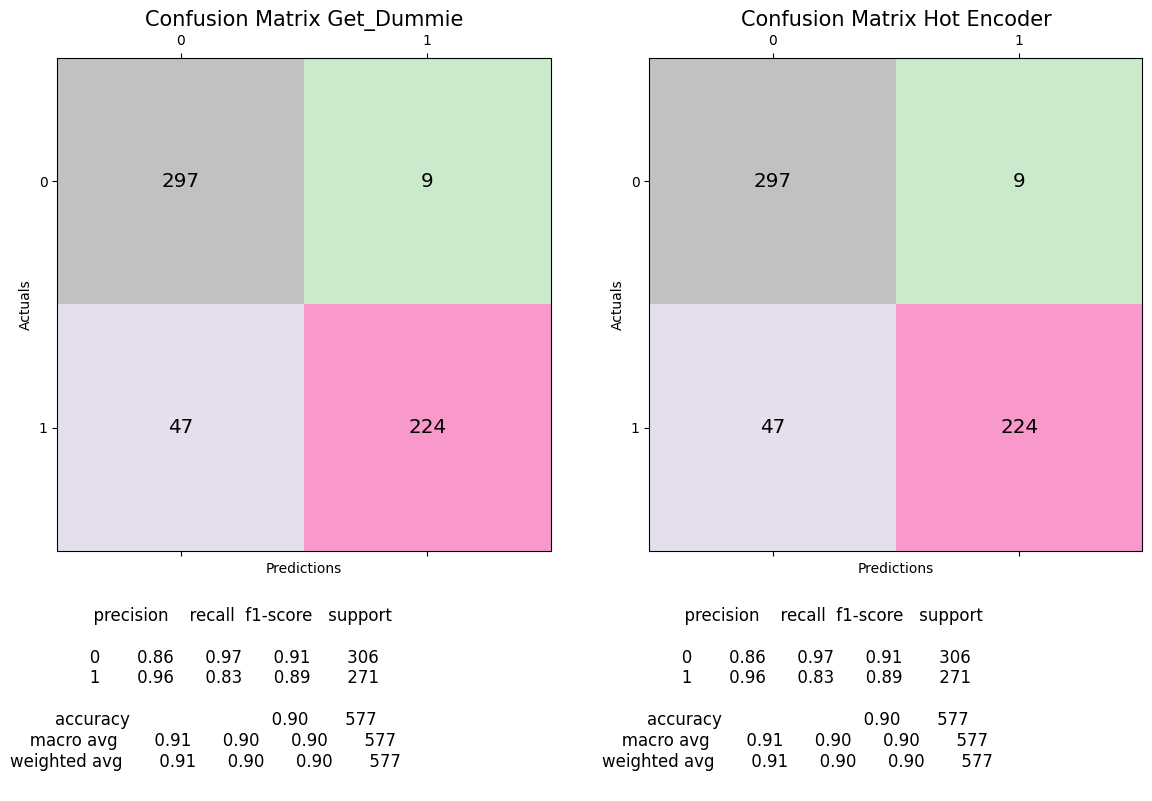

In [93]:
# Create and train the GradientBoostingClassifier model
model = GradientBoostingClassifier(random_state=seed)
model.fit(X_train, y_train)

model_hot = GradientBoostingClassifier(random_state=seed)
model_hot.fit(X_train_hot, y_train_hot)

# Make predictions on the test set
y_pred = model.predict(X_test)

y_pred_hot = model_hot.predict(X_test_hot)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy_hot = accuracy_score(y_test_hot, y_pred_hot)
conf_matrix_hot = confusion_matrix(y_test_hot, y_pred_hot)
classification_rep_hot = classification_report(y_test_hot, y_pred_hot)

fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns
img1 = axs[0].matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        axs[0].text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

axs[0].set_xlabel('Predictions', fontsize=10)
axs[0].set_ylabel('Actuals', fontsize=10)
axs[0].set_title('Confusion Matrix Get_Dummie', fontsize=15)
axs[0].text(0.3, -0.3, classification_rep, va='center', ha='center', transform=axs[0].transAxes, fontsize=12)

img2 = axs[1].matshow(conf_matrix_hot, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix_hot.shape[0]):
    for j in range(conf_matrix_hot.shape[1]):
        axs[1].text(x=j, y=i,s=conf_matrix_hot[i, j], va='center', ha='center', size='x-large')

axs[1].set_xlabel('Predictions', fontsize=10)
axs[1].set_ylabel('Actuals', fontsize=10)
axs[1].set_title('Confusion Matrix Hot Encoder', fontsize=15)
axs[1].text(0.3, -0.3, classification_rep_hot, va='center', ha='center', transform=axs[1].transAxes, fontsize=12)

plt.show()